# Introdução


## Analisando Vendas

In [2]:
import pandas as pd


In [3]:
dfAlucar = pd.read_csv('alucar.csv')
dfAlucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [4]:
dfAlucar.shape

(24, 2)

In [5]:
dfAlucar.isnull().sum().sum()

0

In [6]:
dfAlucar.dtypes

mes       object
vendas     int64
dtype: object

In [7]:
dfAlucar['mes'] = pd.to_datetime(dfAlucar['mes'])

In [8]:
dfAlucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [9]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [10]:
sns.set_palette("Accent")
sns.set_style("whitegrid")

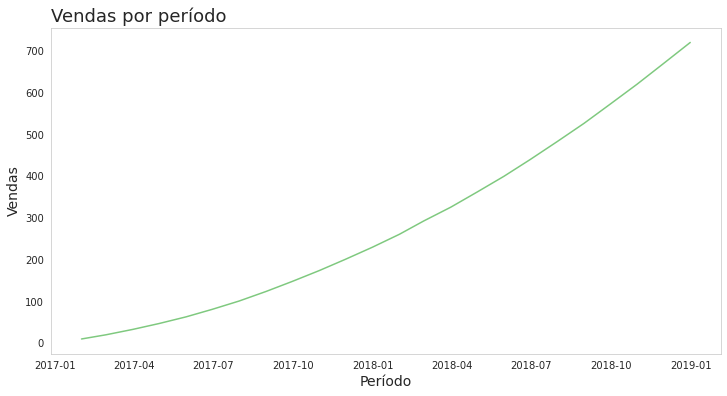

In [11]:
plt.figure(figsize=(12,6))
ax = sns.lineplot(x='mes', y='vendas', data=dfAlucar, )
ax.set_title("Vendas por período", fontsize = 18, loc='left')
ax.set_ylabel("Vendas", fontsize = 14)
ax.set_xlabel("Período", fontsize = 14)
ax.grid(False)

plt.show()


### Decompondo a Série Temporal

In [12]:
dfAlucar['aumento'] = dfAlucar['vendas'].diff()
dfAlucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


In [13]:
'''dfAlucar.fillna('0', inplace=True)
dfAlucar.head()'''

"dfAlucar.fillna('0', inplace=True)\ndfAlucar.head()"

In [14]:
dfAlucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


In [15]:
'''dfAlucar['aumento'] = dfAlucar['aumento'].astype('int64')'''

"dfAlucar['aumento'] = dfAlucar['aumento'].astype('int64')"

In [16]:
def plotar(titulo, labelx, labely, x,y, data):
    plt.figure(figsize=(12,6))
    ax = sns.lineplot(x=x, y=y, data=data)
    ax.set_title(titulo, fontsize = 20,loc='left')
    ax.set_ylabel(labely, fontsize = 14)
    ax.set_xlabel(labelx, fontsize = 14)
    ax.grid(False)
    plt.show()


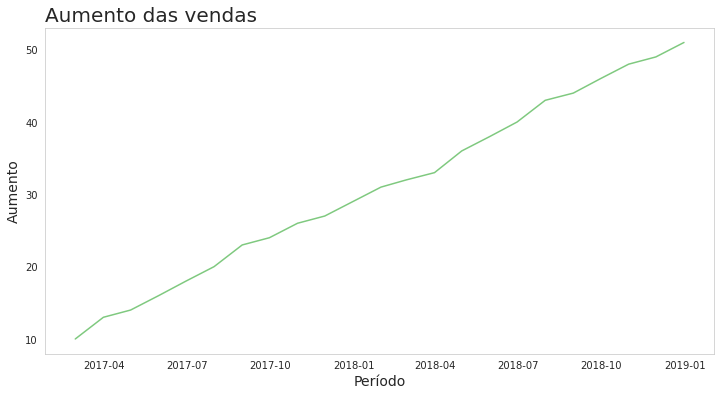

In [17]:
plotar("Aumento das vendas", "Período", "Aumento", "mes", "aumento", dfAlucar)

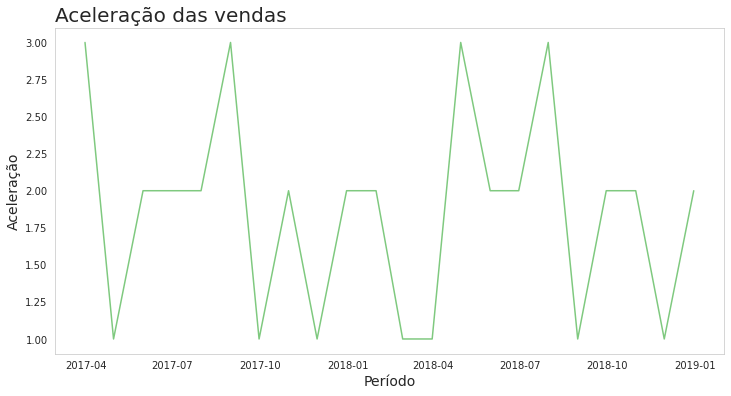

In [18]:
dfAlucar['aceleracao'] = dfAlucar['aumento'].diff()

plotar("Aceleração das vendas", "Período", "Aceleração", "mes", "aceleracao", dfAlucar)

In [19]:
dfAlucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


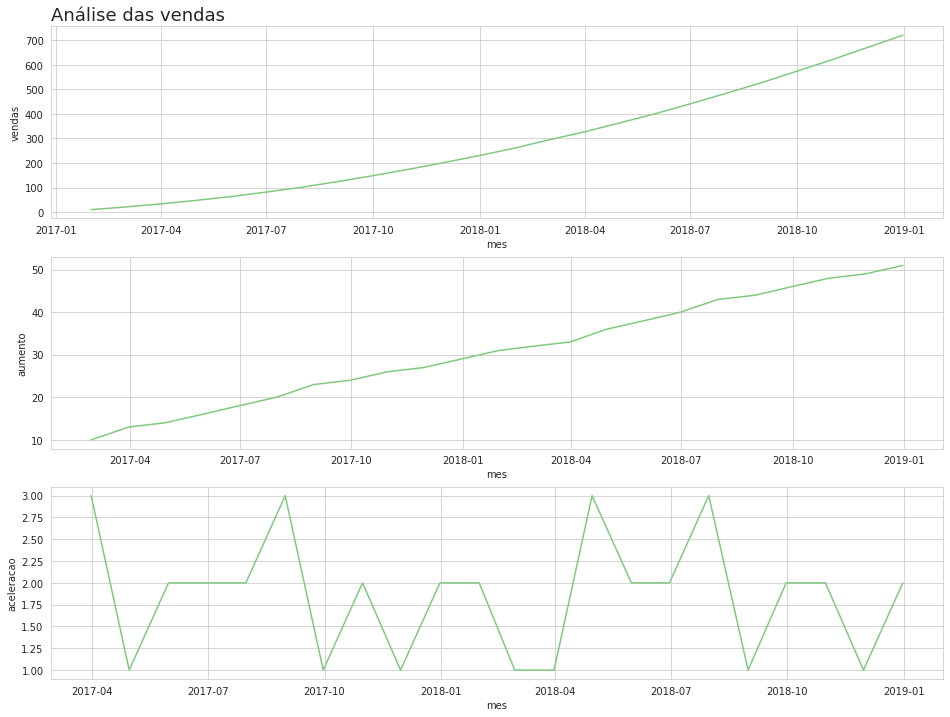

In [20]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)
ax.set_title("Análise das vendas", fontsize = 18, loc='left')
ax = sns.lineplot(x='mes', y='vendas', data=dfAlucar, ax=ax)
ax = plt.subplot(3,1,2)
ax = sns.lineplot(x='mes', y='aumento', data=dfAlucar, ax=ax)
ax = plt.subplot(3,1,3)
ax = sns.lineplot(x='mes', y='aceleracao', data=dfAlucar, ax=ax)

* As vendas estão cresecendo em todo o período analisado.

In [21]:
def plot_comparacao(x, y1,y2,y3, data, titulo):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo, fontsize = 18, loc='left')
    ax = sns.lineplot(x=x, y=y1, data=data, ax=ax)
    ax = plt.subplot(3,1,2)
    ax = sns.lineplot(x=x, y=y2, data=data, ax=ax)
    ax = plt.subplot(3,1,3)
    ax = sns.lineplot(x=x, y=y3, data=data, ax=ax)
    plt.show()
    

### Autocorrelação

In [22]:
from pandas.plotting import autocorrelation_plot

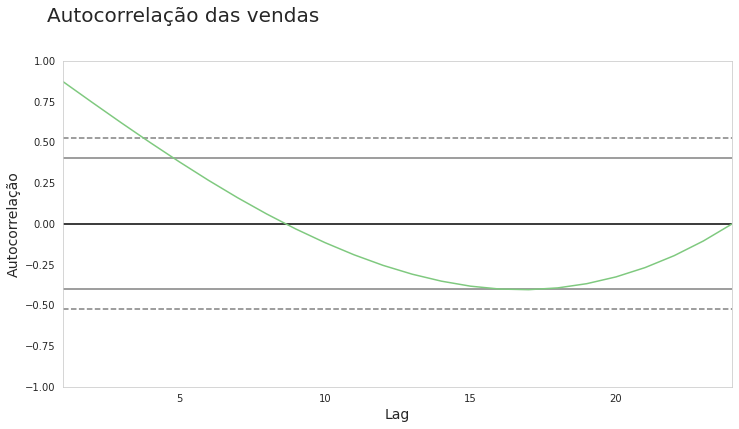

In [23]:
ax = autocorrelation_plot(dfAlucar['vendas'])
ax.figure.set_size_inches(12,6)
ax.set_title("Autocorrelação das vendas", fontsize = 20, x = 0.18, y = 1.1)
ax.set_ylabel("Autocorrelação", fontsize = 14)
ax.set_xlabel("Lag", fontsize = 14)     
plt.show()

## Assinantes


In [25]:
assinantes= pd.read_csv('newsletter_alucar.csv')
assinantes

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49
5,2017-06-30,66
6,2017-07-31,85
7,2017-08-31,107
8,2017-09-30,132
9,2017-10-31,160


In [26]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [27]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])

In [28]:
assinantes

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49
5,2017-06-30,66
6,2017-07-31,85
7,2017-08-31,107
8,2017-09-30,132
9,2017-10-31,160


In [29]:
assinantes.isnull().sum()

mes           0
assinantes    0
dtype: int64

In [30]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()

In [31]:
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


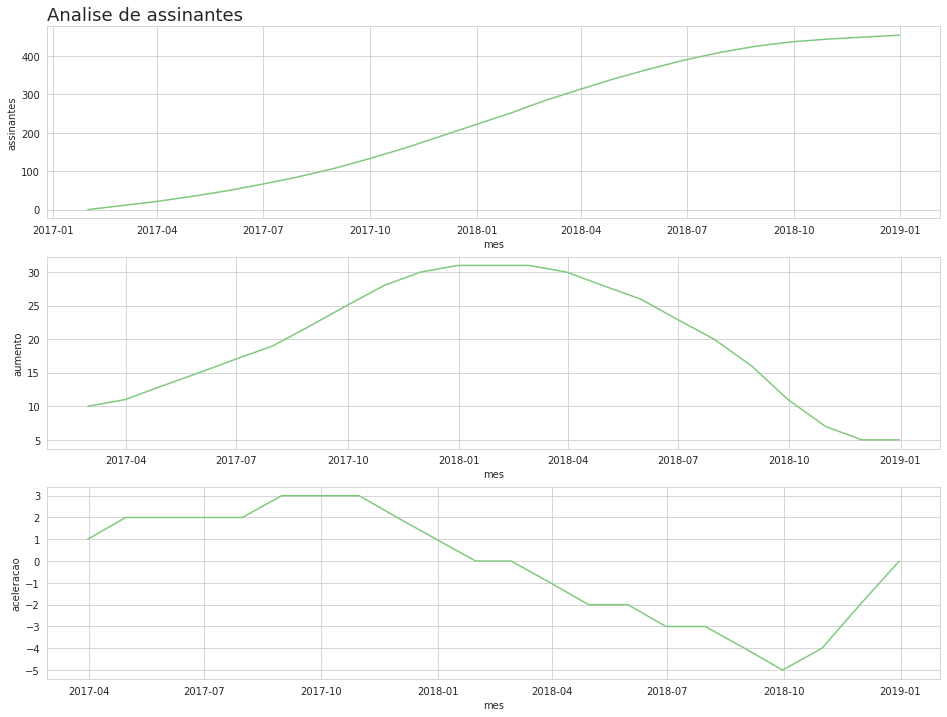

In [32]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao', assinantes, 'Analise de assinantes')

## Sazionalidade

In [34]:
dfChocolura = pd.read_csv('chocolura.csv')
dfChocolura

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211
5,2017-06,300
6,2017-07,210
7,2017-08,205
8,2017-09,208
9,2017-10,210


In [35]:
dfChocolura.dtypes

mes       object
vendas     int64
dtype: object

In [36]:
dfChocolura['mes'] = pd.to_datetime(dfChocolura['mes'])

In [37]:
dfChocolura.isnull().sum()

mes       0
vendas    0
dtype: int64

In [38]:
dfChocolura['aumento'] = dfChocolura['vendas'].diff()	
dfChocolura['aceleracao'] = dfChocolura['aumento'].diff()

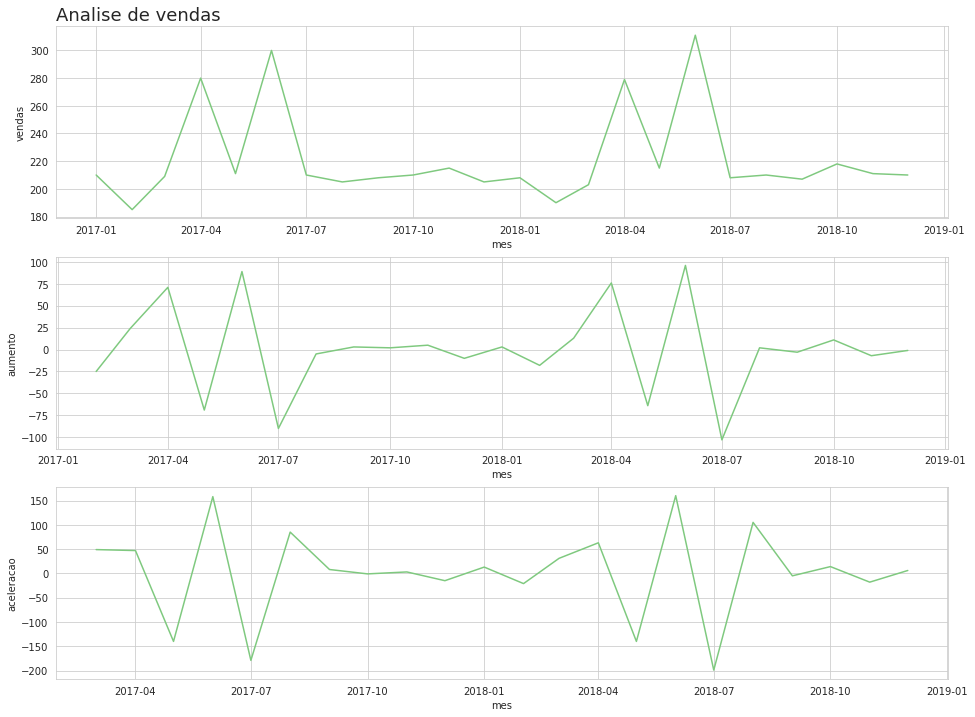

In [39]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', dfChocolura, 'Analise de vendas')

### Vendas diárias Outubro e Novembro

In [82]:
dfVendas = pd.read_csv('vendas_por_dia.csv')
dfVendas

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51
...,...,...
56,2018-11-26,54
57,2018-11-27,60
58,2018-11-28,49
59,2018-11-29,50


In [83]:
dfVendas.dtypes

dia       object
vendas     int64
dtype: object

In [84]:
dfVendas['dia'] = pd.to_datetime(dfVendas['dia'])

In [85]:
dfVendas.isnull().sum()

dia       0
vendas    0
dtype: int64

In [86]:
dfVendas['aumento'] = dfVendas['vendas'].diff()
dfVendas['aceleracao'] = dfVendas['aumento'].diff()

In [87]:
dfVendas.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


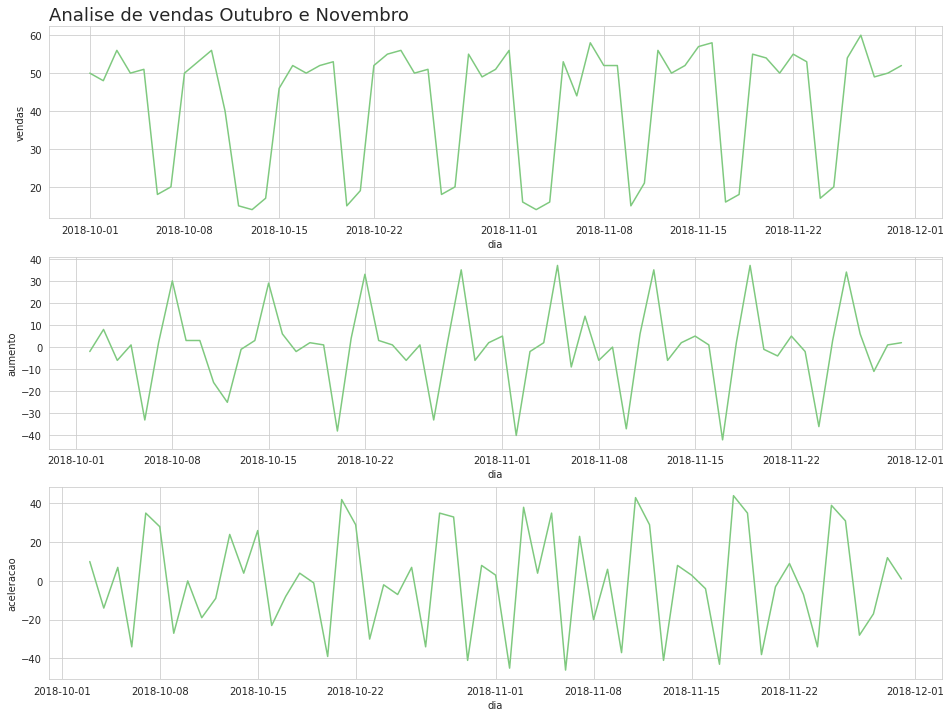

In [88]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', dfVendas, 'Analise de vendas Outubro e Novembro')

## Analisando sazionalidade

In [89]:
dfVendas['dia_da_Semana'] = dfVendas['dia'].dt.day_name()

In [90]:
dfVendas

,dia,vendas,aumento,aceleracao,dia_da_Semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday
...,...,...,...,...,...
56,2018-11-26,54,34.0,31.0,Monday
57,2018-11-27,60,6.0,-28.0,Tuesday
58,2018-11-28,49,-11.0,-17.0,Wednesday
59,2018-11-29,50,1.0,12.0,Thursday


In [91]:
dfVendas['dia_da_Semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [77]:
dias = {'Monday':'Segunda', 'Tuesday': 'Terça', 'Wednesday' : 'Quarta', 'Thursday': 'Quinta',
                              'Friday': 'Sexta', 'Saturday': 'Sábado', 'Sunday': 'Domingo'}

In [92]:
dfVendas['dia_da_Semana']= dfVendas['dia_da_Semana'].map(dias)

In [93]:
dfVendas.dia_da_Semana.unique()

array(['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado',
       'Domingo'], dtype=object)

In [95]:
dfVendas

,dia,vendas,aumento,aceleracao,dia_da_Semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terça
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
...,...,...,...,...,...
56,2018-11-26,54,34.0,31.0,Segunda
57,2018-11-27,60,6.0,-28.0,Terça
58,2018-11-28,49,-11.0,-17.0,Quarta
59,2018-11-29,50,1.0,12.0,Quinta


In [100]:
vendas_agrupadas = dfVendas.groupby('dia_da_Semana')['vendas', 'aumento', 'aceleracao'].mean().round()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [101]:
vendas_agrupadas

,vendas,aumento,aceleracao
dia_da_Semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Sábado,16.0,-28.0,-20.0
Terça,52.0,-1.0,-34.0


## Correlação


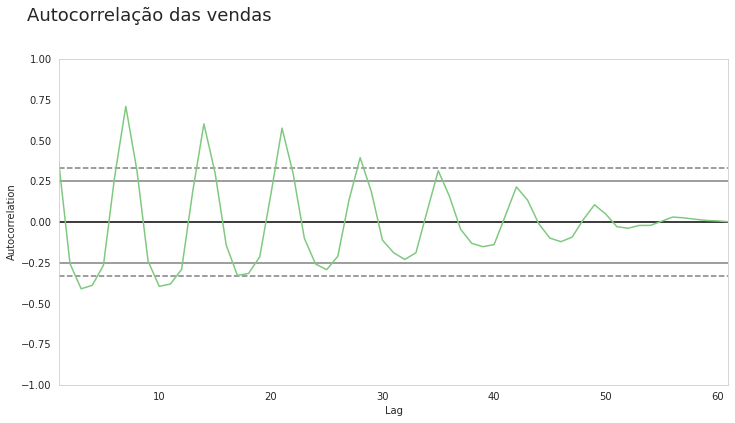

In [112]:
ax = plt.figure(figsize = (12, 6))
ax.suptitle('Autocorrelação das vendas', fontsize = 18, x = 0.23, y = 1)
autocorrelation_plot(dfVendas['vendas'])

## Statsmodels


In [113]:
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


<Figure size 864x432 with 0 Axes>

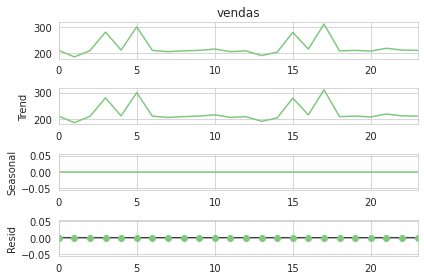

<Figure size 864x432 with 0 Axes>

In [124]:
resultado = seasonal_decompose(dfChocolura['vendas'], freq = 1)
ax = resultado.plot()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


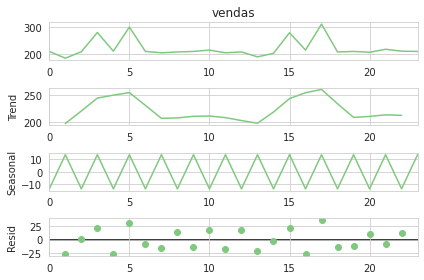

In [125]:
resultado = seasonal_decompose(dfChocolura['vendas'], freq = 2)
ax = resultado.plot()

In [126]:
observacao = resultado.observed
tendencia = resultado.trend
sazionalidade = resultado.seasonal
residuo = resultado.resid


In [130]:
data = ({
    'obeservacao' : observacao,
    'tendencia' : tendencia,
    'sazionalidade' : sazionalidade,
    'residuo' : residuo

})

df = pd.DataFrame(data)

In [138]:
df = df.rename(columns = {'obeservacao' :'observacao' })

In [139]:
df.head()

,observacao,tendencia,sazionalidade,residuo
0,210.0,NaN,-13.386364,NaN
1,185.0,197.25,13.386364,-25.636364
2,209.0,220.75,-13.386364,1.636364
3,280.0,245.00,13.386364,21.613636
4,211.0,250.50,-13.386364,-26.113636


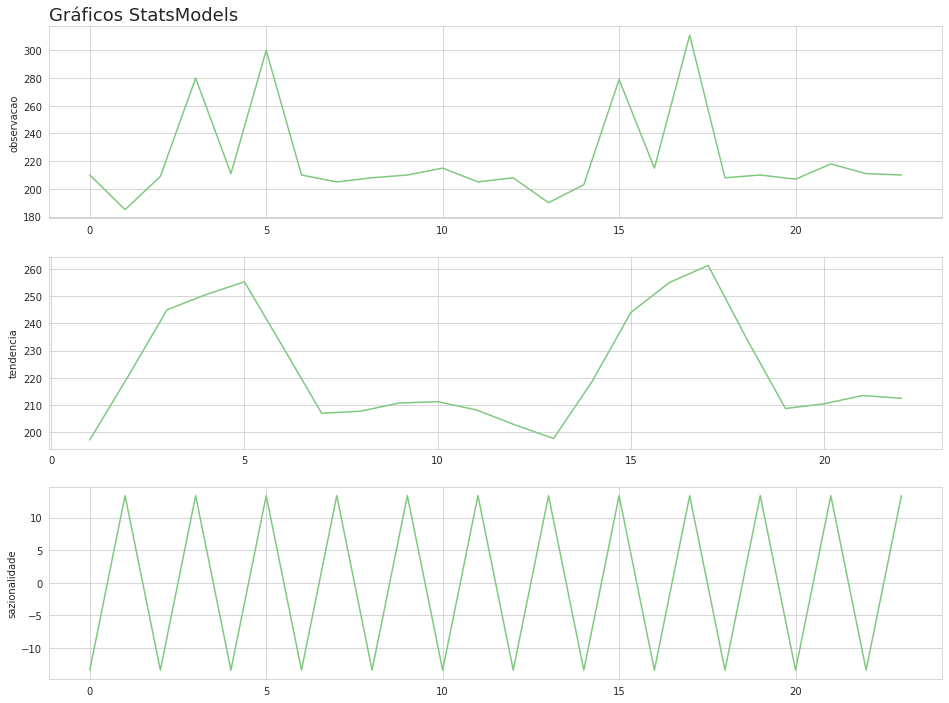

In [140]:
plot_comparacao(df.index, 'observacao', 'tendencia', 'sazionalidade', df, 'Gráficos StatsModels')

## Alucel


In [142]:
dfAlucel = pd.read_csv('alucel.csv')
dfAlucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [145]:
dfAlucel.dtypes

dia        object
vendas    float64
dtype: object

In [147]:
dfAlucel['dia'] = pd.to_datetime(dfAlucel['dia'])

In [149]:
dfAlucel.isnull().sum()

dia       0
vendas    0
dtype: int64

In [150]:
dfAlucel['aumento'] = dfAlucel['vendas'].diff()
dfAlucel['aceleracao'] = dfAlucel['aumento'].diff()

In [151]:
dfAlucel.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


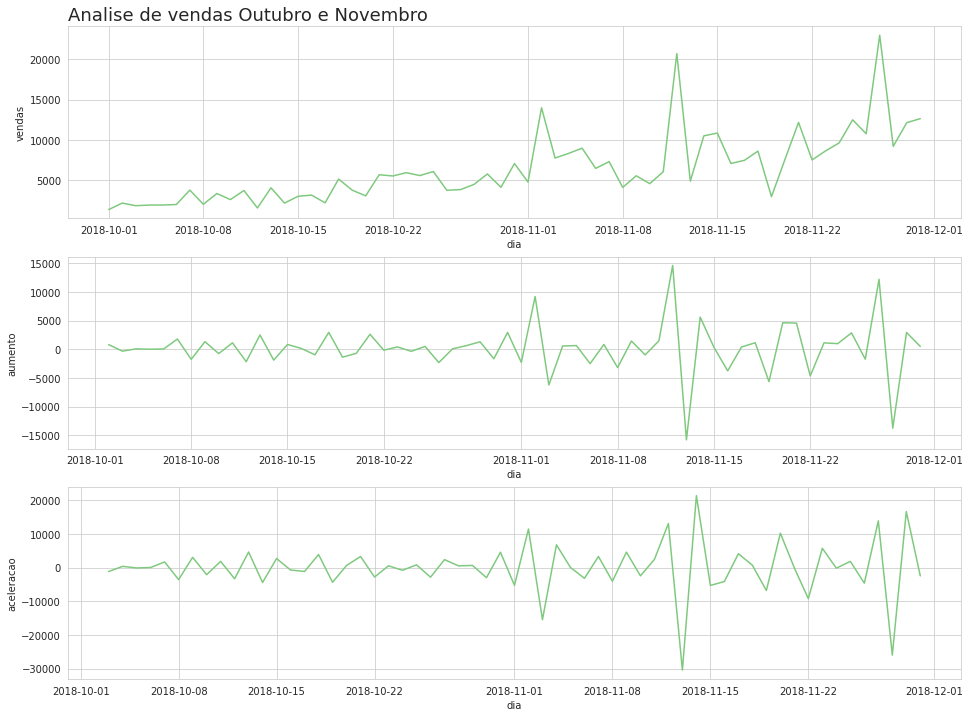

In [154]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', dfAlucel, 'Analise de vendas Outubro e Novembro')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


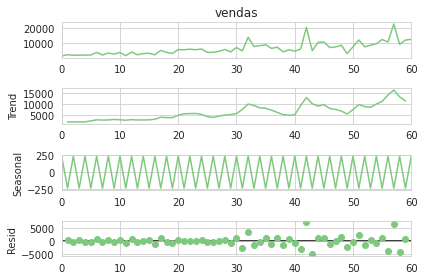

In [159]:
resultado_1 = seasonal_decompose(dfAlucel['vendas'], freq = 2)
ax = resultado_1.plot()

## Média móvel

In [160]:
dfAlucel['media_movel'] = dfAlucel['vendas'].rolling(7).mean() #7dias

In [161]:
dfAlucel.head(10)

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429
7,2018-10-08,2039.59,-1753.48,-3540.66,2252.827143
8,2018-10-09,3365.58,1325.99,3079.47,2421.382857
9,2018-10-10,2616.12,-749.46,-2075.45,2529.348571


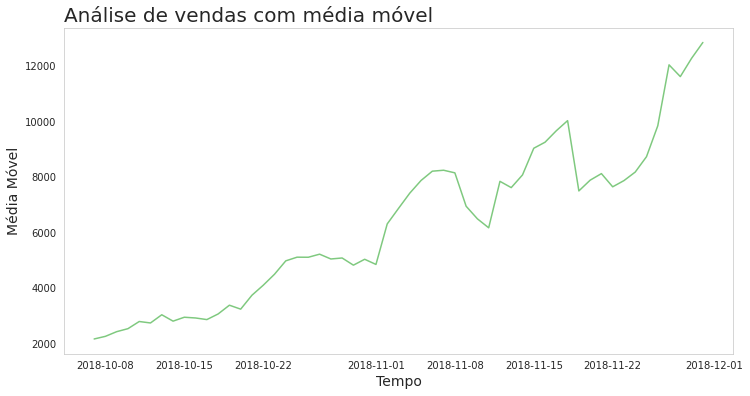

In [163]:
plotar('Análise de vendas com média móvel', 'Tempo', 'Média Móvel', 'dia','media_movel', dfAlucel)

In [164]:
dfAlucel['media_movel21'] = dfAlucel['vendas'].rolling(7).mean() #21dias

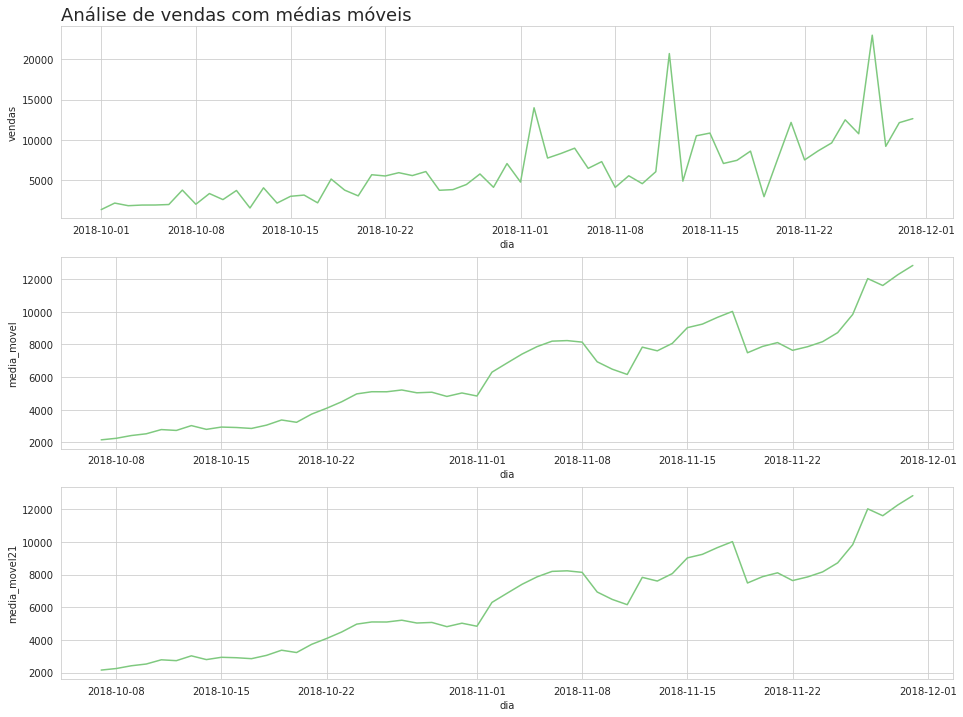

In [165]:
plot_comparacao('dia', 'vendas', 'media_movel', 'media_movel21', dfAlucel, 'Análise de vendas com médias móveis')